## Učitavanje procesiranih podataka

In [ ]:
import pandas as pd

df = pd.read_pickle(r"C:\Users\Lenovo PC\Desktop\detekcija_prevara_u_transakcijama\data\processed_data.pkl")

# Random Forest + SMOTE

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report, 
                           average_precision_score, precision_recall_curve)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## Podjela

In [8]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## SMOTE

In [9]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Random Forest

In [10]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Evaluacija


Average Precision Score: 0.8675


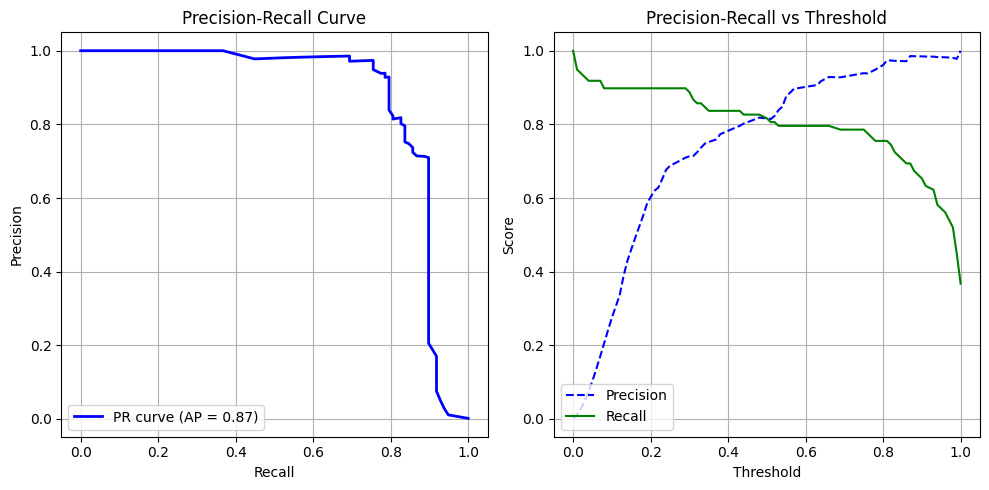


Confusion Matrix:
[[56846    18]
 [   19    79]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8144    0.8061    0.8103        98

    accuracy                         0.9994     56962
   macro avg     0.9070    0.9029    0.9050     56962
weighted avg     0.9993    0.9994    0.9993     56962



In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Vjerojatnoca klase 1

ap_score = average_precision_score(y_test, y_prob)
print(f"\nAverage Precision Score: {ap_score:.4f}")

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue', lw=2, 
         label=f'PR curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

#  XGBoost + SMOTE

In [12]:
import xgboost as xgb

## SMOTE

In [13]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

c:\Users\amers\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:33:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Evaluacija


Average Precision Score: 0.8573


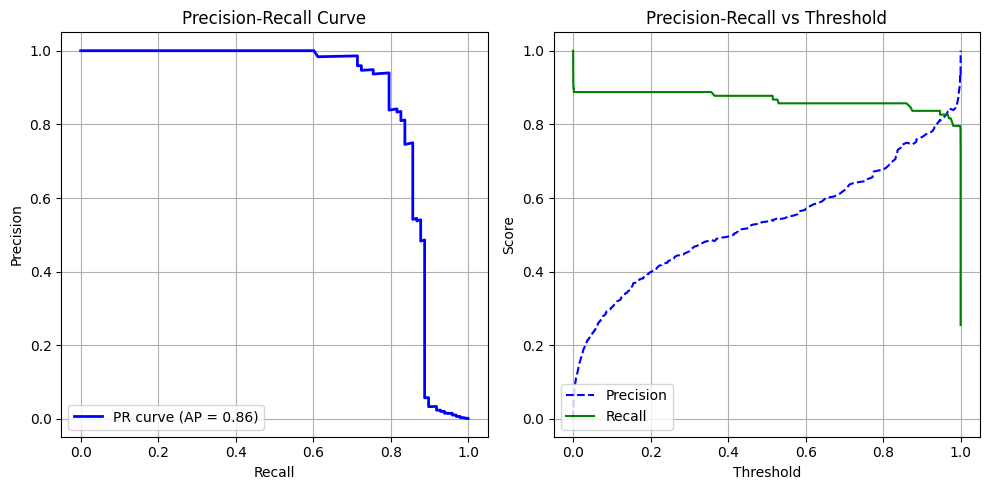


Confusion Matrix:
[[56790    74]
 [   12    86]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9987    0.9992     56864
           1     0.5375    0.8776    0.6667        98

    accuracy                         0.9985     56962
   macro avg     0.7686    0.9381    0.8330     56962
weighted avg     0.9990    0.9985    0.9987     56962



In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Vjerojatnoca klase 1

ap_score = average_precision_score(y_test, y_prob)
print(f"\nAverage Precision Score: {ap_score:.4f}")

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue', lw=2, 
         label=f'PR curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

## Logistic Regression + SMOTE

In [15]:
from sklearn.linear_model import LogisticRegression

## Logistic Regression

In [16]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000)

## Evaluacija


Average Precision Score: 0.7249


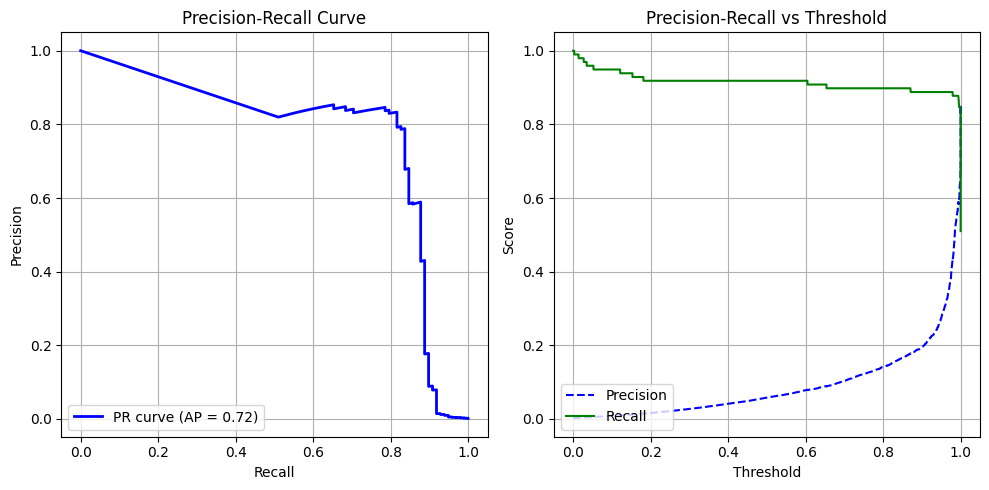


Confusion Matrix:
[[55406  1458]
 [    8    90]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962



In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Vjerojatnoca klase 1

ap_score = average_precision_score(y_test, y_prob)
print(f"\nAverage Precision Score: {ap_score:.4f}")

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue', lw=2, 
         label=f'PR curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, digits=4))